In [1]:
#15.433 - Finance Lab
#William Blair Team
#Getting the necessary inputs for the Option Pricing Model

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

import matplotlib.pyplot as plt

In /Users/panqian/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/panqian/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/panqian/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/panqian/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/panqian/anaconda3/lib/python3.7/site-packa

In [3]:
#Reading the provided files
##Reading the Initial File
Col_Names_1 = ['Date', 'Issuer Name', 'Ticker', 'Country Code', 'Country', 'Debt Security Name', 'Bid Price USD', 'Equity Security Name', 'Equity Price USD', 'Equity Total Return', 'Fiscal Date', 'Total Assets', 'Total Liabilities', 'Total Corporate Debt', 'Total Shareholders Equity', 'Shares Outstanding', 'Dividends per Share', 'Dividends Paid', 'Dividend Yield']
Filepath_1 = 'MexicanSecurityData.csv'
Type = {'Date':'object', 'Issuer Name':'object', 'Ticker':'object', 'Country Code':'object', 'Country':'object', 'Debt Security Name':'object', 'Bid Price USD':'float64', 'Equity Security Name':'object', 'Equity Price USD':'float64', 'Equity Total Return':'float64', 'Fiscal Date':'float64', 'Total Assets':'float64', 'Total Liabilities':'float64', 'Total Corporate Debt':'float64', 'Total Shareholders Equity':'float64', 'Shares Outstanding':'float64', 'Dividends per Share':'float64', 'Dividends Paid':'float64', 'Dividend Yield':'float64'}
Mexican_Data = pd.read_csv(Filepath_1, header = 0, dtype = Type, names = Col_Names_1, na_values = ' NA')


##Reading the Maturity File
Col_Names_2 = ['Debt Name', 'Maturity']
Filepath_2 = 'MexicanMaturities.xlsx'
Mexican_Maturities = pd.read_excel(Filepath_2, header = 0, names = Col_Names_2, na_values = ' NA')


##Reading the Treasury File
Col_Names_3 = ['Date', '3M Libor', '1Y', '3Y', '5Y', '7Y', '10Y', '15Y', '30Y']
Filepath_3 = 'USTRateData.csv'
Treasury_Rate = pd.read_csv(Filepath_3, header = 0, names = Col_Names_3, na_values = ' NA')


## For simplicity, we will start working with one bond - the one of Banorte
Banorte = Mexican_Data[Mexican_Data['Ticker'] == 'BANORT']
# Banorte.head(10)

In [4]:
Treasury_Rate

,Date,3M Libor,1Y,3Y,5Y,7Y,10Y,15Y,30Y
0,2013-12-24,0.002468,0.00134,0.00798,0.01724,0.02420,0.02988,0.03440,0.03894
1,2013-12-25,0.002468,0.00134,0.00799,0.01725,0.02420,0.02989,0.03440,0.03894
2,2013-12-26,0.002468,0.00131,0.00803,0.01736,0.02434,0.03002,0.03453,0.03924
3,2013-12-27,0.002466,0.00126,0.00789,0.01730,0.02434,0.03011,0.03470,0.03938
4,2013-12-28,0.002466,0.00126,0.00789,0.01730,0.02434,0.03011,0.03470,0.03938
...,...,...,...,...,...,...,...,...,...
2550,2020-12-17,0.002386,0.00090,0.00185,0.00385,0.00659,0.00937,0.01142,0.01681
2551,2020-12-18,0.002357,0.00091,0.00184,0.00390,0.00667,0.00953,0.01159,0.01693
2552,2020-12-19,0.002357,0.00091,0.00184,0.00390,0.00667,0.00953,0.01159,0.01693
2553,2020-12-20,0.002357,0.00091,0.00184,0.00390,0.00667,0.00953,0.01159,0.01693


In [5]:
# Check for missing values in Equity Total Return
Banorte[Banorte['Equity Total Return'].isna()]

,Date,Issuer Name,Ticker,Country Code,Country,Debt Security Name,Bid Price USD,Equity Security Name,Equity Price USD,Equity Total Return,Fiscal Date,Total Assets,Total Liabilities,Total Corporate Debt,Total Shareholders Equity,Shares Outstanding,Dividends per Share,Dividends Paid,Dividend Yield
27,2014-02-03,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,6.288432,NaN,20131231.0,7.687077e+10,6.857194e+10,5.088787e+10,8.143544e+09,2.773730e+09,0.059952,1.247470e+08,1.131130
56,2014-03-17,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,6.105702,NaN,20131231.0,7.687077e+10,6.857194e+10,5.088787e+10,8.143544e+09,2.773730e+09,0.059952,1.247470e+08,1.185034
79,2014-04-17,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,6.585953,NaN,20140331.0,7.986190e+10,7.118488e+10,2.898470e+10,8.533073e+09,2.773730e+09,0.063792,0.000000e+00,1.109962
88,2014-05-01,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,6.643177,NaN,20140331.0,7.986190e+10,7.118488e+10,2.898470e+10,8.533073e+09,2.773730e+09,0.063792,0.000000e+00,1.101003
183,2014-09-16,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,6.859356,NaN,20140630.0,7.961892e+10,7.058194e+10,2.704320e+10,8.910423e+09,2.773730e+09,0.052671,0.000000e+00,0.865902
225,2014-11-17,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,5.521833,NaN,20140930.0,7.794321e+10,6.896228e+10,2.575122e+10,8.856185e+09,2.773730e+09,0.069008,4.054155e+07,1.109127
243,2014-12-12,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,5.291779,NaN,20140930.0,7.794321e+10,6.896228e+10,2.575122e+10,8.856185e+09,2.773730e+09,0.069008,4.054155e+07,1.064586
276,2015-02-02,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,5.116013,NaN,20141231.0,7.433444e+10,6.587622e+10,2.490938e+10,8.339500e+09,2.769344e+09,0.066080,4.569392e+07,0.898252
305,2015-03-16,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,5.627877,NaN,20141231.0,7.433444e+10,6.587622e+10,2.490938e+10,8.339500e+09,2.769344e+09,0.066080,4.569392e+07,0.787121
318,2015-04-02,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,5.949733,NaN,20150331.0,7.751563e+10,6.912326e+10,2.751575e+10,8.274305e+09,2.769344e+09,0.065970,4.428197e+07,1.121652


In [6]:
## Drop missing values in Equity Total Return

Banorte = Banorte.dropna(subset=['Equity Total Return'])
Banorte

,Date,Issuer Name,Ticker,Country Code,Country,Debt Security Name,Bid Price USD,Equity Security Name,Equity Price USD,Equity Total Return,Fiscal Date,Total Assets,Total Liabilities,Total Corporate Debt,Total Shareholders Equity,Shares Outstanding,Dividends per Share,Dividends Paid,Dividend Yield
0,2013-12-23,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,6.994969,0.002093,20130930.0,7.528279e+10,6.597613e+10,2.623357e+10,8.979458e+09,2.312838e+09,0.058638,3.229858e+07,0.821448
1,2013-12-24,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,6.942352,-0.007522,20130930.0,7.528279e+10,6.597613e+10,2.623357e+10,8.979458e+09,2.312838e+09,0.058638,3.229858e+07,0.825177
2,2013-12-26,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,6.881383,-0.004448,20130930.0,7.528279e+10,6.597613e+10,2.623357e+10,8.979458e+09,2.312838e+09,0.058638,3.229858e+07,0.830048
3,2013-12-27,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,6.892352,0.001594,20130930.0,7.528279e+10,6.597613e+10,2.623357e+10,8.979458e+09,2.312838e+09,0.058638,3.229858e+07,0.828203
4,2013-12-30,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,NaN,GPO FIN BANORTE COM NPV SERIES O,6.940789,0.007028,20130930.0,7.528279e+10,6.597613e+10,2.623357e+10,8.979458e+09,2.312838e+09,0.058638,3.229858e+07,0.821448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,2020-12-15,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,107.28125,GPO FIN BANORTE COM NPV SERIES O,5.380600,-0.020741,20200930.0,8.132478e+10,7.147819e+10,2.383104e+10,9.723409e+09,2.883457e+09,NaN,0.000000e+00,0.000000
1746,2020-12-16,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,107.76000,GPO FIN BANORTE COM NPV SERIES O,5.494833,0.021231,20200930.0,8.132478e+10,7.147819e+10,2.383104e+10,9.723409e+09,2.883457e+09,NaN,0.000000e+00,0.000000
1747,2020-12-17,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,107.65625,GPO FIN BANORTE COM NPV SERIES O,5.794077,0.054459,20200930.0,8.132478e+10,7.147819e+10,2.383104e+10,9.723409e+09,2.883457e+09,NaN,0.000000e+00,0.000000
1748,2020-12-18,MX Banorte,BANORT,MX,MEXICO,MX Banorte 5 3/4% due 31 Quoted Price Bid,107.68750,GPO FIN BANORTE COM NPV SERIES O,5.427956,-0.063189,20200930.0,8.132478e+10,7.147819e+10,2.383104e+10,9.723409e+09,2.883457e+09,NaN,0.000000e+00,0.000000


In [7]:
#First, we get the Total MV of Assets

##Getting the necessary inputs with the correct data type
Total_Debt = pd.to_numeric(Banorte['Total Corporate Debt'], errors = 'coerce').to_numpy()
Stock_Price = pd.to_numeric(Banorte['Equity Price USD'], errors = 'coerce').to_numpy()
Shares_Outstanding = pd.to_numeric(Banorte['Shares Outstanding'], errors = 'coerce').to_numpy()

##Getting the MV of Equity
Equity = Stock_Price *  Shares_Outstanding

##Getting the MV of Assets
MV_Assets = Total_Debt + Equity
len(Total_Debt)

1700

In [8]:
#Second, we get the Assets' Volatility

##We calculate the equity volatility
Lambda = 0.9075


Equity_Returns = pd.to_numeric(Banorte['Equity Total Return'], errors = 'coerce').to_numpy()
l = len(Equity_Returns)
Equity_Volatility = np.zeros(l)
Equity_Volatility[1] = np.sqrt(Equity_Returns[0]**2)


#Louccas' old version
# for i in range(2,l):
#     Equity_Volatility[i] = np.sqrt(Lambda * Equity_Volatility[i-1]**2 + (1 - Lambda) * Equity_Returns[i-1]**2)


## Need to fix this
## Using EWMA, assume we are using last 252 days (one year)
EWMA1 = []
n = len(Equity_Returns)-250
for i in range(n):
    total = 0
    for j in range(250):
        total = total + (Lambda**(250-j)) * (Equity_Returns[i+j]**2)
    EWMA1.append((total*(1-Lambda))**0.5)


##Since we used 250 days as the time window, we cannot calculate the volatilities for the first 250 days. 
##For consistency in list lengths of other variables below, I filled EWMA with 250 NaN in the beginning of the list.

EWMA = [np.nan]*250+EWMA1


In [9]:
##We get the D/E ratio
DE_Ratio = Total_Debt / Equity

##Finally, we calculate the Asset Volatility
#####Asset_Volatility = (1 / (1 + DE_Ratio)) * Equity_Volatility
Asset_Volatility = (1 / (1 + DE_Ratio)) * EWMA

##Annuliaze Volatility
Annual_Volatility = Asset_Volatility*np.sqrt(250)

print(Asset_Volatility[-20:-1])

[0.01242899 0.01283545 0.01187296 0.01270764 0.01234256 0.01302971
 0.01446606 0.01423405 0.01366495 0.0128117  0.01281637 0.01233737
 0.01209149 0.0122139  0.01198361 0.01127814 0.01114238 0.01124387
 0.01205272]


In [10]:
#Third, we get the strike price - straightforward
Strike_Price = Total_Debt

In [11]:
len(Strike_Price)

1700

In [12]:
#Fourth, we get the time to maturity

##We get the maturity of the Banorte Bond from the Mexican Maturities File
Banorte_Maturity = Mexican_Maturities[Mexican_Maturities['Debt Name'] == 'MX Banorte 5 3/4% due 31 Yield to Mat Bid']
Banorte_Maturity = pd.to_datetime(Banorte_Maturity['Maturity'], format = '%Y%m%d').to_numpy()

##We get the date of the bond from the intial file
Date = pd.to_datetime(Banorte['Date'], format = '%Y/%m/%d').to_numpy()

#Finally, we take the time difference between the actual date and Maturity to get the time to expiration
Expiration_Time = ( Banorte_Maturity - Date ) / (365 * 24 * 60 * 60 * 10**9)

In [13]:
#Fifth, we get the risk-free rate for the US Yield Curve
Treasury_Date = pd.to_datetime(Treasury_Rate['Date'], format = '%Y/%m/%d').to_numpy()
# Treasury_Date[0:20]

#For a specific trading day of the bond, we get the closest Treasury Date and for this Treasury Date the closest maturity
Mat = np.array([0.25, 1, 3, 5, 7, 10, 15, 30])
Risk_Free_Rate = []
m = len(Date)
for i in range(m):
    #Specific_Date = Date[i]
    #We get the closest day when treasury rates are reported
    #should be a list of 2555 entries
    
    ## some changes here!
    day_difference = [abs(Date[i] - x) for x in Treasury_Date]
    
    #Find the index of that closest bond issuing day 
    #Need to be fixed 
    Day_Index = day_difference.index(min(day_difference))
    
    #We get the closest maturity for the specific date
    # should be a list of 8 entries
    maturity_difference = [abs(Expiration_Time[i].astype(np.int64) - x) for x in Mat]
    
    #Find the index of that closest maturity 
    Maturity_Index = maturity_difference.index(min(maturity_difference))
    
    Treasury_Specific_Rate = Treasury_Rate.iloc[Day_Index, Maturity_Index]
#     print(Treasury_Specific_Rate)
    #We get the continuously-compounded rate
    Rate = np.log(1 + Treasury_Specific_Rate)
    Risk_Free_Rate.append(Rate) 

len(Risk_Free_Rate)

1700

In [14]:
Risk_Free_Rate[1650:]

[0.005136784105152353,
 0.0055843782939006634,
 0.005524710642700101,
 0.005514765688024084,
 0.00507708974028272,
 0.00507708974028272,
 0.005186526687300154,
 0.005286004429237438,
 0.0055048206344449615,
 0.0055843782939006634,
 0.00589260445479898,
 0.0061411047567629965,
 0.006121227004936164,
 0.005773302371841829,
 0.005494875481960764,
 0.005554544913328957,
 0.006001952195634335,
 0.006419351802183406,
 0.006608118214244683,
 0.0055048206344449615,
 0.0054749848802694975,
 0.00594230945562923,
 0.006826645342277345,
 0.007174203748000453,
 0.006379606964038988,
 0.006538576839582357,
 0.006220611813056201,
 0.006389543321668518,
 0.006081470315867954,
 0.006081470315867954,
 0.00631004969602168,
 0.0064491593941792685,
 0.006469030628581134,
 0.006081470315867954,
 0.006101348857976239,
 0.006826645342277345,
 0.006836577258988437,
 0.006568380878031968,
 0.0069855441737120905,
 0.006588249743520312,
 0.006588249743520312,
 0.00672732074942653,
 0.0064789660977090735,
 0.00631

In [15]:
# option pricing function (no dividend)
def priceBS(S0, K, T, r, sigma, Type):
    d1 = (np.log(S0/K) + (r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = (np.log(S0/K) + (r-0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    if Type == "C":
        return S0*stats.norm.cdf(d1,0,1) - K*np.exp(-r*T)*stats.norm.cdf(d2, 0, 1)
    else: 
        return K*np.exp(-r*T)*stats.norm.cdf(-d2, 0, 1) - S0*stats.norm.cdf(-d1,0,1)

In [16]:
## Non-dividend paying 
simu_asset_price = []
for i in range(len(Equity_Returns)):
    simu_asset_price.append(Strike_Price[i]-priceBS(MV_Assets[i], Strike_Price[i], int(Expiration_Time[i]), Risk_Free_Rate[i], Annual_Volatility[i], 'P'))
# simu_asset_price

In [17]:
## Dividend yield 
Dividend_yield = pd.to_numeric(Banorte['Dividend Yield'], errors = 'coerce').to_numpy()
#####Questions on it????
Dividend_yield = np.log(1 + Dividend_yield)


In [18]:
# I put Black Scholes dividend pricing model here. 
# But I don't feel like this is the model that we need. 

def priceBS_div(S0, K, T, r, sigma, q, Type):
    d1 = (np.log(S0/K) + (r - q + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = (np.log(S0/K) + (r - q - 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    if Type == "C":
        return S0*np.exp(-q*T)*stats.norm.cdf(d1,0,1) - K*np.exp(-r*T)*stats.norm.cdf(d2, 0, 1)
    else: 
        return K*np.exp(-r*T)*stats.norm.cdf(-d2, 0, 1) - S0*np.exp(-q*T)*stats.norm.cdf(-d1,0,1)

In [23]:
d1 = (np.log(100/95) + (0.01 - 0 + 0.5*0.02**2)*1) / (0.02*np.sqrt(1))
d2 = (np.log(100/95) + (0.01 - 0 - 0.5*0.02**2)*1) / (0.02*np.sqrt(1))
print(95*np.exp(0)*stats.norm.cdf(-d2, 0, 1) - 100*np.exp(0)*stats.norm.cdf(-d1,0,1))

0.0016536613165938768


In [19]:
Dividend_yield[1450:]

array([1.82698253, 1.79644707, 1.76905263, 1.74965765, 1.75022472,
       1.78974274, 1.80773679, 1.79531271, 1.79652276, 1.80085026,
       1.80627745, 1.8370014 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
# Dividend paying 
simu_liability_price_div = []
for i in range(len(Equity_Returns)):
    simu_liability_price_div.append(priceBS_div(MV_Assets[i], Strike_Price[i], int(Expiration_Time[i]), Risk_Free_Rate[i], Asset_Volatility[i], Dividend_yield[i], 'P'))
simu_liability_price_div[1450:]


[21074441872.42282,
 21019832544.655907,
 20906558283.902596,
 20890753066.570263,
 20820915215.791664,
 20811922516.40288,
 20820915306.635017,
 20789459135.65368,
 20861435240.724842,
 20883983493.25057,
 20929159796.744648,
 20933683316.088493,
 1.3229858134755014e-114,
 2.248123996342174e-124,
 5.988947840291271e-103,
 2.2044825356087964e-114,
 5.847051096095147e-127,
 5.7022156469226686e-117,
 1.1967246861931538e-117,
 3.812796143456957e-103,
 9.202902034027688e-106,
 9.736967448953849e-116,
 1.4568383334611656e-125,
 2.3413692399877412e-137,
 4.1109054777766356e-126,
 5.353746482851865e-128,
 3.584185077986998e-141,
 1.568085727941539e-150,
 4.272092683257476e-158,
 4.8815271694046116e-169,
 2.6263078644112116e-176,
 6.793344346686992e-186,
 1.1766646641075108e-166,
 1.3055329119470408e-178,
 8.96573309147055e-202,
 1.21353521637118e-220,
 2.916740695404925e-243,
 4.281210536357484e-262,
 2.0219969577460094e-235,
 1.5738107993443624e-262,
 4.4181587591218476e-269,
 3.704696128938

In [21]:
Banorte['Total Liabilities'][252:280]

259    6.587622e+10
260    6.587622e+10
261    6.587622e+10
262    6.587622e+10
263    6.587622e+10
264    6.587622e+10
265    6.587622e+10
266    6.587622e+10
267    6.587622e+10
268    6.587622e+10
269    6.587622e+10
270    6.587622e+10
271    6.587622e+10
272    6.587622e+10
273    6.587622e+10
274    6.587622e+10
275    6.587622e+10
277    6.587622e+10
278    6.587622e+10
279    6.587622e+10
280    6.587622e+10
281    6.587622e+10
282    6.587622e+10
283    6.587622e+10
284    6.587622e+10
285    6.587622e+10
286    6.587622e+10
287    6.587622e+10
Name: Total Liabilities, dtype: float64

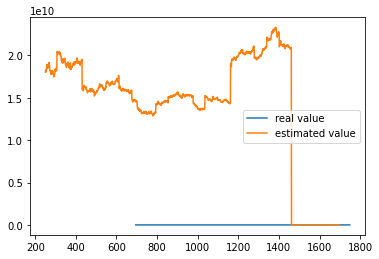

In [22]:
plt.plot(Banorte['Bid Price USD'], label = "real value")
plt.plot(simu_liability_price_div, label = "estimated value")
plt.legend()